Loading MNIST Dataset...

Compiling model...


C:\Users\thabu\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
C:\Users\thabu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the Model...
Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.4369 - loss: 1.6758
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9363 - loss: 0.2081
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9580 - loss: 0.1343
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9701 - loss: 0.0961
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9764 - loss: 0.0764
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9798 - loss: 0.0659
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9826 - loss: 0.0553
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9846 - loss: 0.0486
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9865 - loss: 0.0435
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9869 - loss: 0.0404
Epoch 11/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9884 - loss: 0.0377
Epoch 1

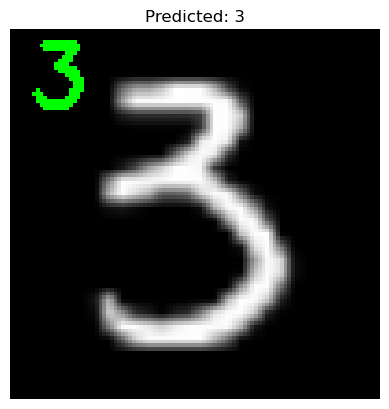

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label: 2, Actual Value: 2


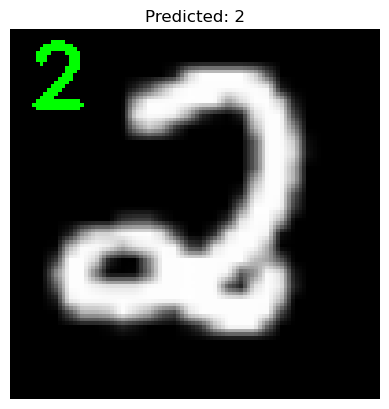

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: 5, Actual Value: 5


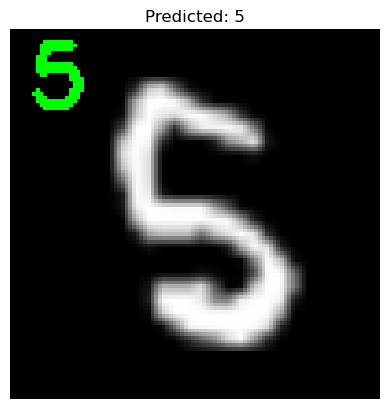

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label: 5, Actual Value: 5


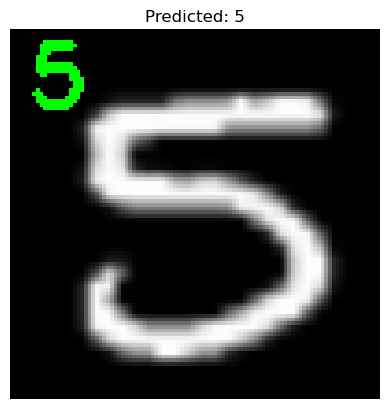

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label: 8, Actual Value: 8


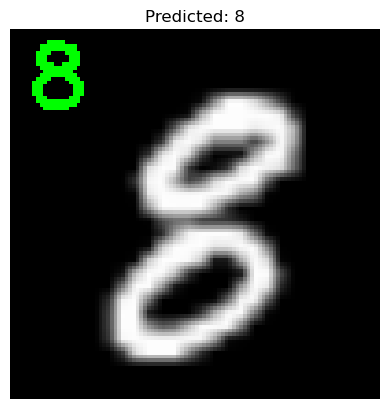

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

# Define the CNN class
class CNN:
    @staticmethod
    def build(width, height, depth, total_classes, Saved_Weights_Path=None):
        # Initialize the Model
        model = Sequential()

        # First CONV => RELU => POOL Layer
        model.add(Conv2D(20, (5, 5), padding="same", input_shape=(depth, height, width)))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Second CONV => RELU => POOL Layer
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # Third CONV => RELU => POOL Layer
        model.add(Conv2D(100, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first"))

        # FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # Using Softmax Classifier for Linear Classification
        model.add(Dense(total_classes))
        model.add(Activation("softmax"))

        # If the saved_weights file is already present, load that weights
        if Saved_Weights_Path is not None:
            model.load_weights(Saved_Weights_Path)
        return model

# Read/Download MNIST Dataset
print('Loading MNIST Dataset...')
dataset = fetch_openml('mnist_784')

# Convert the data to numpy array and reshape it
mnist_data = dataset.data.to_numpy().reshape((dataset.data.shape[0], 28, 28))
mnist_data = mnist_data[:, np.newaxis, :, :]

# Divide data into testing and training sets.
train_img, test_img, train_labels, test_labels = train_test_split(mnist_data / 255.0, dataset.target.astype("int"), test_size=0.1)

# Now each image rows and columns are of 28x28 matrix type.
img_rows, img_columns = 28, 28

# Transform training and testing data to 10 classes in range [0, classes] ; num. of classes = 0 to 9 = 10 classes
total_classes = 10  # 0 to 9 labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define and compile the SGD optimizer and CNN model
print('\nCompiling model...')
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
clf = CNN.build(width=28, height=28, depth=1, total_classes=10, Saved_Weights_Path=None)
clf.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Train and test the model
b_size = 128  # Batch size
num_epoch = 20  # Number of epochs
verb = 1  # Verbose

print('\nTraining the Model...')
clf.fit(train_img, train_labels, batch_size=b_size, epochs=num_epoch, verbose=verb)

# Evaluate accuracy and loss function of test data
print('Evaluating Accuracy and Loss Function...')
loss, accuracy = clf.evaluate(test_img, test_labels, batch_size=128, verbose=1)
print('Accuracy of Model: {:.2f}%'.format(accuracy * 100))

# Show the images using Matplotlib and making random selections.
for num in np.random.choice(np.arange(0, len(test_labels)), size=(5,)):
    # Predict the label of digit using CNN.
    probs = clf.predict(test_img[np.newaxis, num])
    prediction = probs.argmax(axis=1)

    # Resize the Image to 100x100 from 28x28 for better view.
    image = (test_img[num][0] * 255).astype("uint8")
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, str(prediction[0]), (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Convert BGR to RGB for displaying with Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show and print the Actual Image and Predicted Label Value
    print('Predicted Label: {}, Actual Value: {}'.format(prediction[0], np.argmax(test_labels[num])))
    plt.imshow(image_rgb)
    plt.title(f'Predicted: {prediction[0]}')
    plt.axis('off')
    plt.show()

Loading MNIST Dataset...

Compiling model...


C:\Users\thabu\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
C:\Users\thabu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the model...
Epoch 1/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 61s 119ms/step - accuracy: 0.7702 - loss: 0.7663
Epoch 2/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 54s 108ms/step - accuracy: 0.9736 - loss: 0.0857
Epoch 3/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 54s 109ms/step - accuracy: 0.9818 - loss: 0.0585
Epoch 4/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 53s 108ms/step - accuracy: 0.9863 - loss: 0.0420
Epoch 5/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.9891 - loss: 0.0340
Epoch 6/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.9907 - loss: 0.0280
Epoch 7/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 55s 111ms/step - accuracy: 0.9923 - loss: 0.0227
Epoch 8/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 55s 111ms/step - accuracy: 0.9939 - loss: 0.0183
Epoch 9/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 53s 107ms/step - accuracy: 0.9949 - loss: 0.0174
Epoch 10/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 55s 111ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 11/20
493/493 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.9963 - loss: 0.0

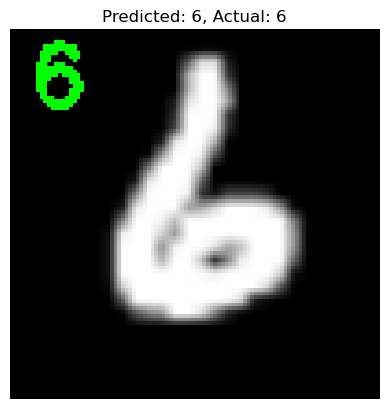

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


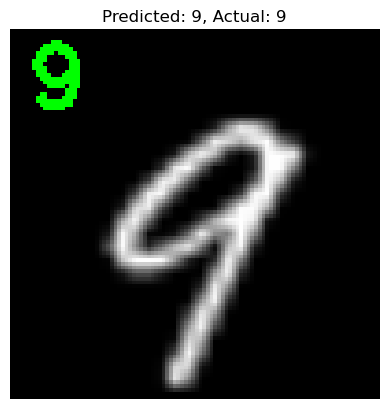

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


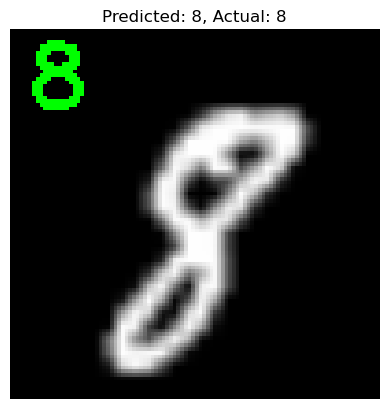

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


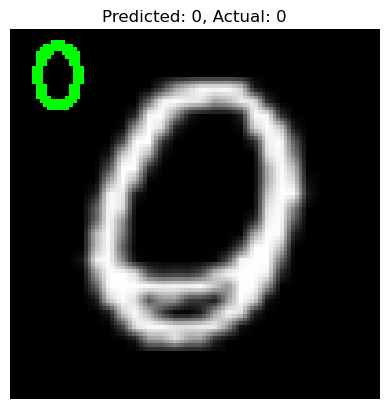

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


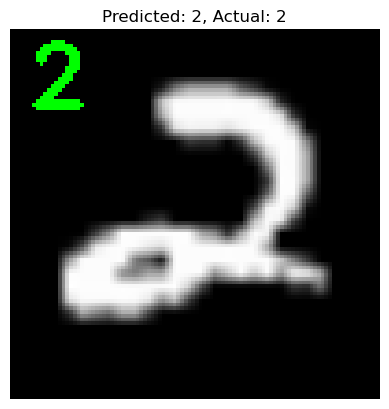

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Define the CNN model
def build_model(width, height, depth, total_classes):
    model = Sequential()
    input_shape = (height, width, depth)

    # First convolutional layer with pooling
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer with pooling
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the volume, then fully connected layers
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dense(total_classes, activation="softmax"))

    return model

# Load MNIST dataset
print('Loading MNIST Dataset...')
dataset = fetch_openml('mnist_784', version=1)

# Convert the DataFrame to a NumPy array
data = dataset.data.to_numpy()
labels = dataset.target.astype("int").to_numpy()

# Reshape the data
mnist_data = data.reshape((data.shape[0], 28, 28, 1))

# Divide data into training and testing sets
train_img, test_img, train_labels, test_labels = train_test_split(mnist_data / 255.0, labels, test_size=0.1)

# Transform labels to categorical
total_classes = 10
train_labels = to_categorical(train_labels, total_classes)
test_labels = to_categorical(test_labels, total_classes)

# Define and compile the model
print('\nCompiling model...')
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
clf = build_model(width=28, height=28, depth=1, total_classes=total_classes)
clf.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# Train the model
print('\nTraining the model...')
b_size = 128
num_epoch = 20
clf.fit(train_img, train_labels, batch_size=b_size, epochs=num_epoch, verbose=1)

# Evaluate the model
print('\nEvaluating the model...')
loss, accuracy = clf.evaluate(test_img, test_labels, batch_size=128, verbose=1)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

# Function to display the image and prediction
def display_prediction(num, model, test_img, test_labels):
    # Predict the label
    probs = model.predict(test_img[np.newaxis, num])
    prediction = probs.argmax(axis=1)

    # Resize the image for better view
    image = (test_img[num] * 255).astype("uint8").squeeze()
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, str(prediction[0]), (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {prediction[0]}, Actual: {np.argmax(test_labels[num])}')
    plt.axis('off')
    plt.show()

# Show the images and predictions
for num in np.random.choice(np.arange(0, len(test_labels)), size=(5,)):
    display_prediction(num, clf, test_img, test_labels)
